<a href="https://colab.research.google.com/github/fahernkhan/Model-untuk-Klasifikasi-Banyak-Kelas/blob/main/jst_untuk_mengklasifikasikan_spesies_bunga_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

unduh dataset : https://www.kaggle.com/datasets/uciml/iris

In [3]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [5]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df = df.drop(columns='Id')

melakukan one hot encoding di label kita yang merupakan data kategorikal menggunakan Fungsi get_dummies()

In [7]:
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [8]:
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


menggabungkan kolom hasil one hot encoding dan membuang kolom spesies karena kolom tersebut tidak akan dipakai

In [9]:
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


konversi dataframe tersebut menjadi numpy array dengan fungsi values dari dataframe

In [10]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

memisahkan antara atribut dan label dengan menjalankan kolom di bawah

In [11]:
# Pilih 4 kolom pertama untuk dijadikan sebagai atribut
X = dataset[:,0:4]
# Pilih 3 kolom terakhir sebagai label
y = dataset[:,4:7]


melakukan normalisasi

In [12]:
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

pembagian data menjadi data latih dan data uji. Untuk ukuran data testing yang digunakan 30%

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

membuat arsitektur model yang kali ini menggunakan 3 buah layer. Activation function yang digunakan pada layer terakhir dipilih,softmax karena activation tersebut umum dipakai untuk klasifikasi multi kelas seperti ini

In [14]:
model = Sequential([    
                    Dense(64, activation='relu', input_shape=(4,)),    
                    Dense(64, activation='relu'),    
                    Dense(3, activation='softmax'),])

menentukan optimizer dan loss function dari model. Untuk masalah klasifikasi multi kelas, kali ini dapat menggunakan loss ‘categorical_crossentropy

In [15]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

melatih ML

In [16]:
hist = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 7ms/step - loss: 1.0725 - accuracy: 0.5524
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0361 - accuracy: 0.6571
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0051 - accuracy: 0.6571
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9762 - accuracy: 0.6571
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9488 - accuracy: 0.6571
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9219 - accuracy: 0.6571
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8919 - accuracy: 0.6571
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8616 - accuracy: 0.6571
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8288 - accuracy: 0.6571
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7942 - accuracy: 0.6571
Epoch 11/100
4/4 [===========

terakhir menguji akurasi prediksi model pada data uji

In [17]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 11ms/step - loss: 0.0852 - accuracy: 0.9556


[0.08521286398172379, 0.9555555582046509]

Plot Loss dan Akurasi dari Trained Model

In [18]:
import matplotlib.pyplot as plt

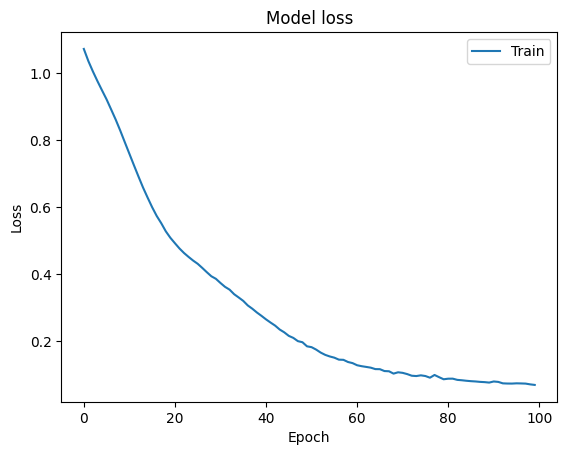

In [19]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

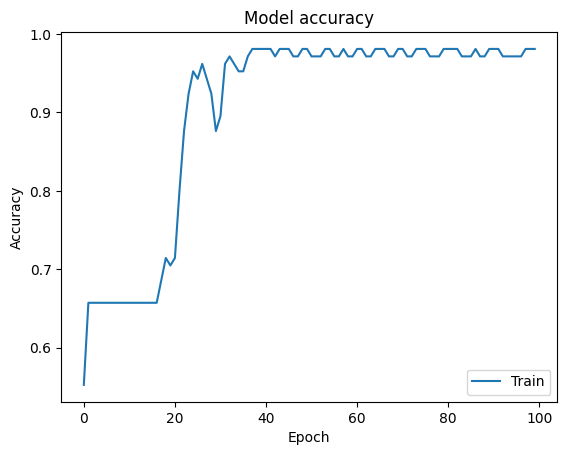

In [20]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

Mencoba menggunakan fungsi callbacks

In [4]:
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
df = pd.read_csv('Iris.csv')
df = df.drop(columns='Id')
category = pd.get_dummies(df.Species)
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
dataset = new_df.values
X = dataset[:,0:4]
y = dataset[:,4:7]
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)
model = Sequential([    
                    Dense(64, activation='relu', input_shape=(4,)),    
                    Dense(64, activation='relu'),    
                    Dense(3, activation='softmax'),])
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

kelas callback kita harus inherit tf.keras.callbacks.Callback. Selanjutnya kita buat fungsi yang paling penting yaitu on_epoch_end().Selanjutnya kode if(logs.get(‘accuracy’)>0.9) sangat intuitif menunjukkan kalau kode itu memiliki arti “jika akurasi lebih besar dari 0.9 maka eksekusi perintah berikutnya”. Kita juga dapat menulis kode print(“\nAkurasi telah mencapai >90%!”) untuk ditampilkan ketika callback aktif.Kode self.model.stop_training = True adalah kode yang memberi tahu model untuk menghentikan pelatihan. Setelah kelas ini dibuat kita buat objek dari kelas tersebut

In [5]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

Untuk menggunakan callback, kita hanya perlu menambahkan parameter callback dan mengisi objek callback yang telah kita buat pada parameter tersebut

In [6]:
model.fit(X_train, Y_train, epochs=50, callbacks=[callbacks])

Epoch 1/50
4/4 [==============================] - 1s 7ms/step - loss: 1.1327 - accuracy: 0.3238
Epoch 2/50
4/4 [==============================] - 0s 4ms/step - loss: 1.0801 - accuracy: 0.6000
Epoch 3/50
4/4 [==============================] - 0s 4ms/step - loss: 1.0390 - accuracy: 0.7048
Epoch 4/50
4/4 [==============================] - 0s 4ms/step - loss: 0.9997 - accuracy: 0.7048
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 0.9641 - accuracy: 0.7048
Epoch 6/50
4/4 [==============================] - 0s 5ms/step - loss: 0.9302 - accuracy: 0.7048
Epoch 7/50
4/4 [==============================] - 0s 4ms/step - loss: 0.8980 - accuracy: 0.7048
Epoch 8/50
4/4 [==============================] - 0s 4ms/step - loss: 0.8619 - accuracy: 0.7048
Epoch 9/50
4/4 [==============================] - 0s 6ms/step - loss: 0.8288 - accuracy: 0.7048
Epoch 10/50
4/4 [==============================] - 0s 5ms/step - loss: 0.7960 - accuracy: 0.7048
Epoch 11/50
4/4 [======================